In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

In [32]:
data = pd.read_csv('student_data.csv')

In [33]:
data.head()

,Unnamed: 0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,Label
0,0,-457277.00000,459008.09375,199905.593750,-246188.734375,17225.037109,219423.500000,313621.09375,394116.87500,466588.56250,45570.738281,420428.28125,263473.96875,707.566833,-187177.437500,103806.328125,278456.78125,Guilt
1,1,-457704.53125,457118.75000,199507.015625,-245910.859375,17148.615234,217579.750000,307432.15625,391738.81250,466886.28125,45671.050781,420306.50000,263643.46875,755.846619,-187146.859375,103952.242188,278223.43750,Guilt
2,2,-457366.59375,457964.18750,199718.375000,-246231.109375,17166.095703,218490.625000,309024.84375,392576.21875,463261.53125,45562.691406,419395.62500,263698.71875,799.834839,-187107.703125,103903.960938,277770.65625,Guilt
3,3,-457015.75000,458894.37500,199792.953125,-246017.062500,17220.185547,219254.515625,312727.37500,393349.75000,468585.18750,45763.855469,420863.84375,263371.50000,651.776855,-187110.390625,103624.476562,279322.06250,Guilt
4,4,-457274.31250,457177.21875,199443.187500,-245839.500000,17118.417969,217842.609375,305266.53125,391196.46875,464039.37500,46013.835938,419429.40625,263952.46875,1256.346802,-186526.734375,103913.078125,277922.50000,Guilt


In [34]:
data.tail()

,Unnamed: 0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,Label
26040,15622,-389656.34375,476813.12500,271870.34375,-240021.25000,16134.316406,257766.218750,315433.71875,453419.96875,443655.12500,24742.843750,448998.62500,251663.656250,-6958.724121,-194838.906250,95904.007812,318491.96875,Control
26041,15623,-389789.93750,476503.06250,271791.50000,-239771.81250,16156.421875,257157.890625,315800.09375,453781.53125,447271.81250,24712.267578,449945.43750,251477.515625,-7165.790527,-194776.671875,95714.640625,320228.43750,Control
26042,15624,-389730.37500,475828.21875,271691.18750,-239800.78125,16095.983398,256192.828125,311433.46875,452565.43750,442756.06250,24676.863281,448711.62500,251743.578125,-6729.663086,-194725.718750,96291.312500,317945.87500,Control
26043,15625,-389554.43750,477244.96875,272107.46875,-239987.46875,16187.536133,258271.015625,318239.84375,454150.62500,446545.46875,24728.361328,449942.21875,251432.453125,-7041.872559,-194810.468750,95753.796875,319726.31250,Control
26044,15626,-389818.90625,475629.21875,271631.09375,-239667.75000,16106.711914,255999.171875,311662.00000,452588.50000,445354.56250,24824.919922,449440.65625,251590.156250,-6763.995605,-194767.562500,96007.000000,319032.15625,Control


In [35]:
data.shape

(26045, 18)

In [36]:
data.drop('Unnamed: 0' , inplace = True , axis = 1)

In [37]:
data

,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,Label
0,-457277.00000,459008.09375,199905.593750,-246188.734375,17225.037109,219423.500000,313621.09375,394116.87500,466588.56250,45570.738281,420428.28125,263473.968750,707.566833,-187177.437500,103806.328125,278456.78125,Guilt
1,-457704.53125,457118.75000,199507.015625,-245910.859375,17148.615234,217579.750000,307432.15625,391738.81250,466886.28125,45671.050781,420306.50000,263643.468750,755.846619,-187146.859375,103952.242188,278223.43750,Guilt
2,-457366.59375,457964.18750,199718.375000,-246231.109375,17166.095703,218490.625000,309024.84375,392576.21875,463261.53125,45562.691406,419395.62500,263698.718750,799.834839,-187107.703125,103903.960938,277770.65625,Guilt
3,-457015.75000,458894.37500,199792.953125,-246017.062500,17220.185547,219254.515625,312727.37500,393349.75000,468585.18750,45763.855469,420863.84375,263371.500000,651.776855,-187110.390625,103624.476562,279322.06250,Guilt
4,-457274.31250,457177.21875,199443.187500,-245839.500000,17118.417969,217842.609375,305266.53125,391196.46875,464039.37500,46013.835938,419429.40625,263952.468750,1256.346802,-186526.734375,103913.078125,277922.50000,Guilt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26040,-389656.34375,476813.12500,271870.343750,-240021.250000,16134.316406,257766.218750,315433.71875,453419.96875,443655.12500,24742.843750,448998.62500,251663.656250,-6958.724121,-194838.906250,95904.007812,318491.96875,Control
26041,-389789.93750,476503.06250,271791.500000,-239771.812500,16156.421875,257157.890625,315800.09375,453781.53125,447271.81250,24712.267578,449945.43750,251477.515625,-7165.790527,-194776.671875,95714.640625,320228.43750,Control
26042,-389730.37500,475828.21875,271691.187500,-239800.781250,16095.983398,256192.828125,311433.46875,452565.43750,442756.06250,24676.863281,448711.62500,251743.578125,-6729.663086,-194725.718750,96291.312500,317945.87500,Control
26043,-389554.43750,477244.96875,272107.468750,-239987.468750,16187.536133,258271.015625,318239.84375,454150.62500,446545.46875,24728.361328,449942.21875,251432.453125,-7041.872559,-194810.468750,95753.796875,319726.31250,Control


In [38]:
data.shape

(26045, 17)

In [39]:
data['Label'].value_counts()

Control    15627
Guilt      10418
Name: Label, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26045 entries, 0 to 26044
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch_1    26045 non-null  float64
 1   ch_2    26045 non-null  float64
 2   ch_3    26045 non-null  float64
 3   ch_4    26045 non-null  float64
 4   ch_5    26045 non-null  float64
 5   ch_6    26045 non-null  float64
 6   ch_7    26045 non-null  float64
 7   ch_8    26045 non-null  float64
 8   ch_9    26045 non-null  float64
 9   ch_10   26045 non-null  float64
 10  ch_11   26045 non-null  float64
 11  ch_12   26045 non-null  float64
 12  ch_13   26045 non-null  float64
 13  ch_14   26045 non-null  float64
 14  ch_15   26045 non-null  float64
 15  ch_16   26045 non-null  float64
 16  Label   26045 non-null  object 
dtypes: float64(16), object(1)
memory usage: 3.4+ MB


In [41]:
data.isnull().sum()

ch_1     0
ch_2     0
ch_3     0
ch_4     0
ch_5     0
ch_6     0
ch_7     0
ch_8     0
ch_9     0
ch_10    0
ch_11    0
ch_12    0
ch_13    0
ch_14    0
ch_15    0
ch_16    0
Label    0
dtype: int64

In [42]:
data.duplicated().sum()

0

In [43]:
data.describe()

,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16
count,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000,26045.000000
mean,-449423.488924,456605.609516,224805.821141,-242987.134903,17156.017509,235672.745446,316862.003326,410322.485376,462525.947679,36131.986518,431651.498353,262040.785158,9.138893,-190483.793266,97062.241998,288287.093074
std,78541.169180,22241.873073,30959.925293,3898.491153,1348.389164,21796.820788,10200.503787,47551.380904,14347.910940,13438.106597,7920.694594,11726.821028,7788.082795,2516.628393,3868.211826,35658.283257
min,-609983.750000,407157.218750,177691.000000,-250339.718750,16030.067383,196295.343750,304847.562500,317714.125000,440401.593750,22431.853516,418498.156250,250802.671875,-8122.266113,-195336.718750,90922.601562,220386.406250
25%,-455117.812500,455292.156250,200229.078125,-245606.687500,16206.847656,221338.062500,310123.468750,394341.093750,451283.875000,24847.451172,426353.812500,253365.781250,-5735.636230,-192897.515625,94435.765625,279832.218750
50%,-402953.687500,468210.218750,235054.875000,-240465.968750,16504.371094,249516.281250,313415.625000,437861.562500,456755.031250,28122.427734,429998.937500,256172.453125,-3872.037354,-190362.828125,95262.421875,306358.718750
75%,-398171.843750,470823.218750,248462.171875,-239944.015625,17161.490234,252491.390625,316612.281250,445379.781250,470433.781250,45634.574219,436526.343750,264117.687500,1621.663818,-189342.515625,99172.546875,313082.500000
max,-389506.687500,479038.281250,272107.468750,-237881.921875,19967.214844,259091.234375,343234.812500,454676.312500,492855.437500,60437.687500,450118.187500,286117.718750,17035.785156,-184647.046875,104966.117188,323660.593750


<AxesSubplot:xlabel='Label', ylabel='count'>

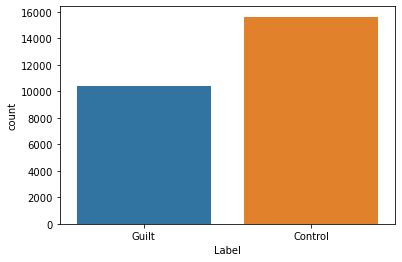

In [44]:
sns.countplot(x = 'Label' , data = data)

In [45]:
data[data['ch_2'] >= 3]

,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,Label
0,-457277.00000,459008.09375,199905.593750,-246188.734375,17225.037109,219423.500000,313621.09375,394116.87500,466588.56250,45570.738281,420428.28125,263473.968750,707.566833,-187177.437500,103806.328125,278456.78125,Guilt
1,-457704.53125,457118.75000,199507.015625,-245910.859375,17148.615234,217579.750000,307432.15625,391738.81250,466886.28125,45671.050781,420306.50000,263643.468750,755.846619,-187146.859375,103952.242188,278223.43750,Guilt
2,-457366.59375,457964.18750,199718.375000,-246231.109375,17166.095703,218490.625000,309024.84375,392576.21875,463261.53125,45562.691406,419395.62500,263698.718750,799.834839,-187107.703125,103903.960938,277770.65625,Guilt
3,-457015.75000,458894.37500,199792.953125,-246017.062500,17220.185547,219254.515625,312727.37500,393349.75000,468585.18750,45763.855469,420863.84375,263371.500000,651.776855,-187110.390625,103624.476562,279322.06250,Guilt
4,-457274.31250,457177.21875,199443.187500,-245839.500000,17118.417969,217842.609375,305266.53125,391196.46875,464039.37500,46013.835938,419429.40625,263952.468750,1256.346802,-186526.734375,103913.078125,277922.50000,Guilt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26040,-389656.34375,476813.12500,271870.343750,-240021.250000,16134.316406,257766.218750,315433.71875,453419.96875,443655.12500,24742.843750,448998.62500,251663.656250,-6958.724121,-194838.906250,95904.007812,318491.96875,Control
26041,-389789.93750,476503.06250,271791.500000,-239771.812500,16156.421875,257157.890625,315800.09375,453781.53125,447271.81250,24712.267578,449945.43750,251477.515625,-7165.790527,-194776.671875,95714.640625,320228.43750,Control
26042,-389730.37500,475828.21875,271691.187500,-239800.781250,16095.983398,256192.828125,311433.46875,452565.43750,442756.06250,24676.863281,448711.62500,251743.578125,-6729.663086,-194725.718750,96291.312500,317945.87500,Control
26043,-389554.43750,477244.96875,272107.468750,-239987.468750,16187.536133,258271.015625,318239.84375,454150.62500,446545.46875,24728.361328,449942.21875,251432.453125,-7041.872559,-194810.468750,95753.796875,319726.31250,Control


In [46]:
data.nunique()

ch_1     20670
ch_2     18972
ch_3     19340
ch_4      7832
ch_5     18955
ch_6     18866
ch_7     17935
ch_8     21382
ch_9     20856
ch_10    15256
ch_11    19553
ch_12    13342
ch_13    13331
ch_14    11381
ch_15    12033
ch_16    19662
Label        2
dtype: int64

In [47]:
l = []
for i in data['ch_1'].unique():
    if i <=3 or i >=41:
        l.append(i)
print(len(l))
    

20670


In [48]:
l = []
for i in data['ch_2'].unique():
    if i <=3 or i >=41:
        l.append(i)
print(len(l))
    

18972


In [49]:
l = []
for i in data['ch_3'].unique():
    if i <=1 and i >=50:
        l.append(i)
print(len(l))
    

0


In [50]:
l = []
for i in data['ch_4'].unique():
    if i <=1 and i >=50:
        l.append(i)
print(len(l))
    

0


In [51]:
l = []
for i in data['ch_5'].unique():
    if i <=1 and i >=50:
        l.append(i)
print(len(l))
    

0


In [52]:
time = [i/125 for i in range(len(data))]

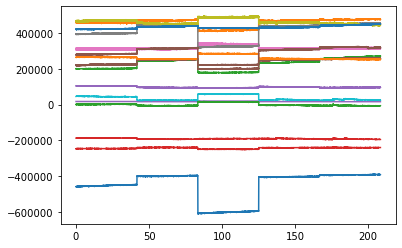

In [53]:
plt.plot(time,np.array(data.iloc[:,:-1]))

In [54]:
channels = [f'ch_{i}' for i in range(1,17)]


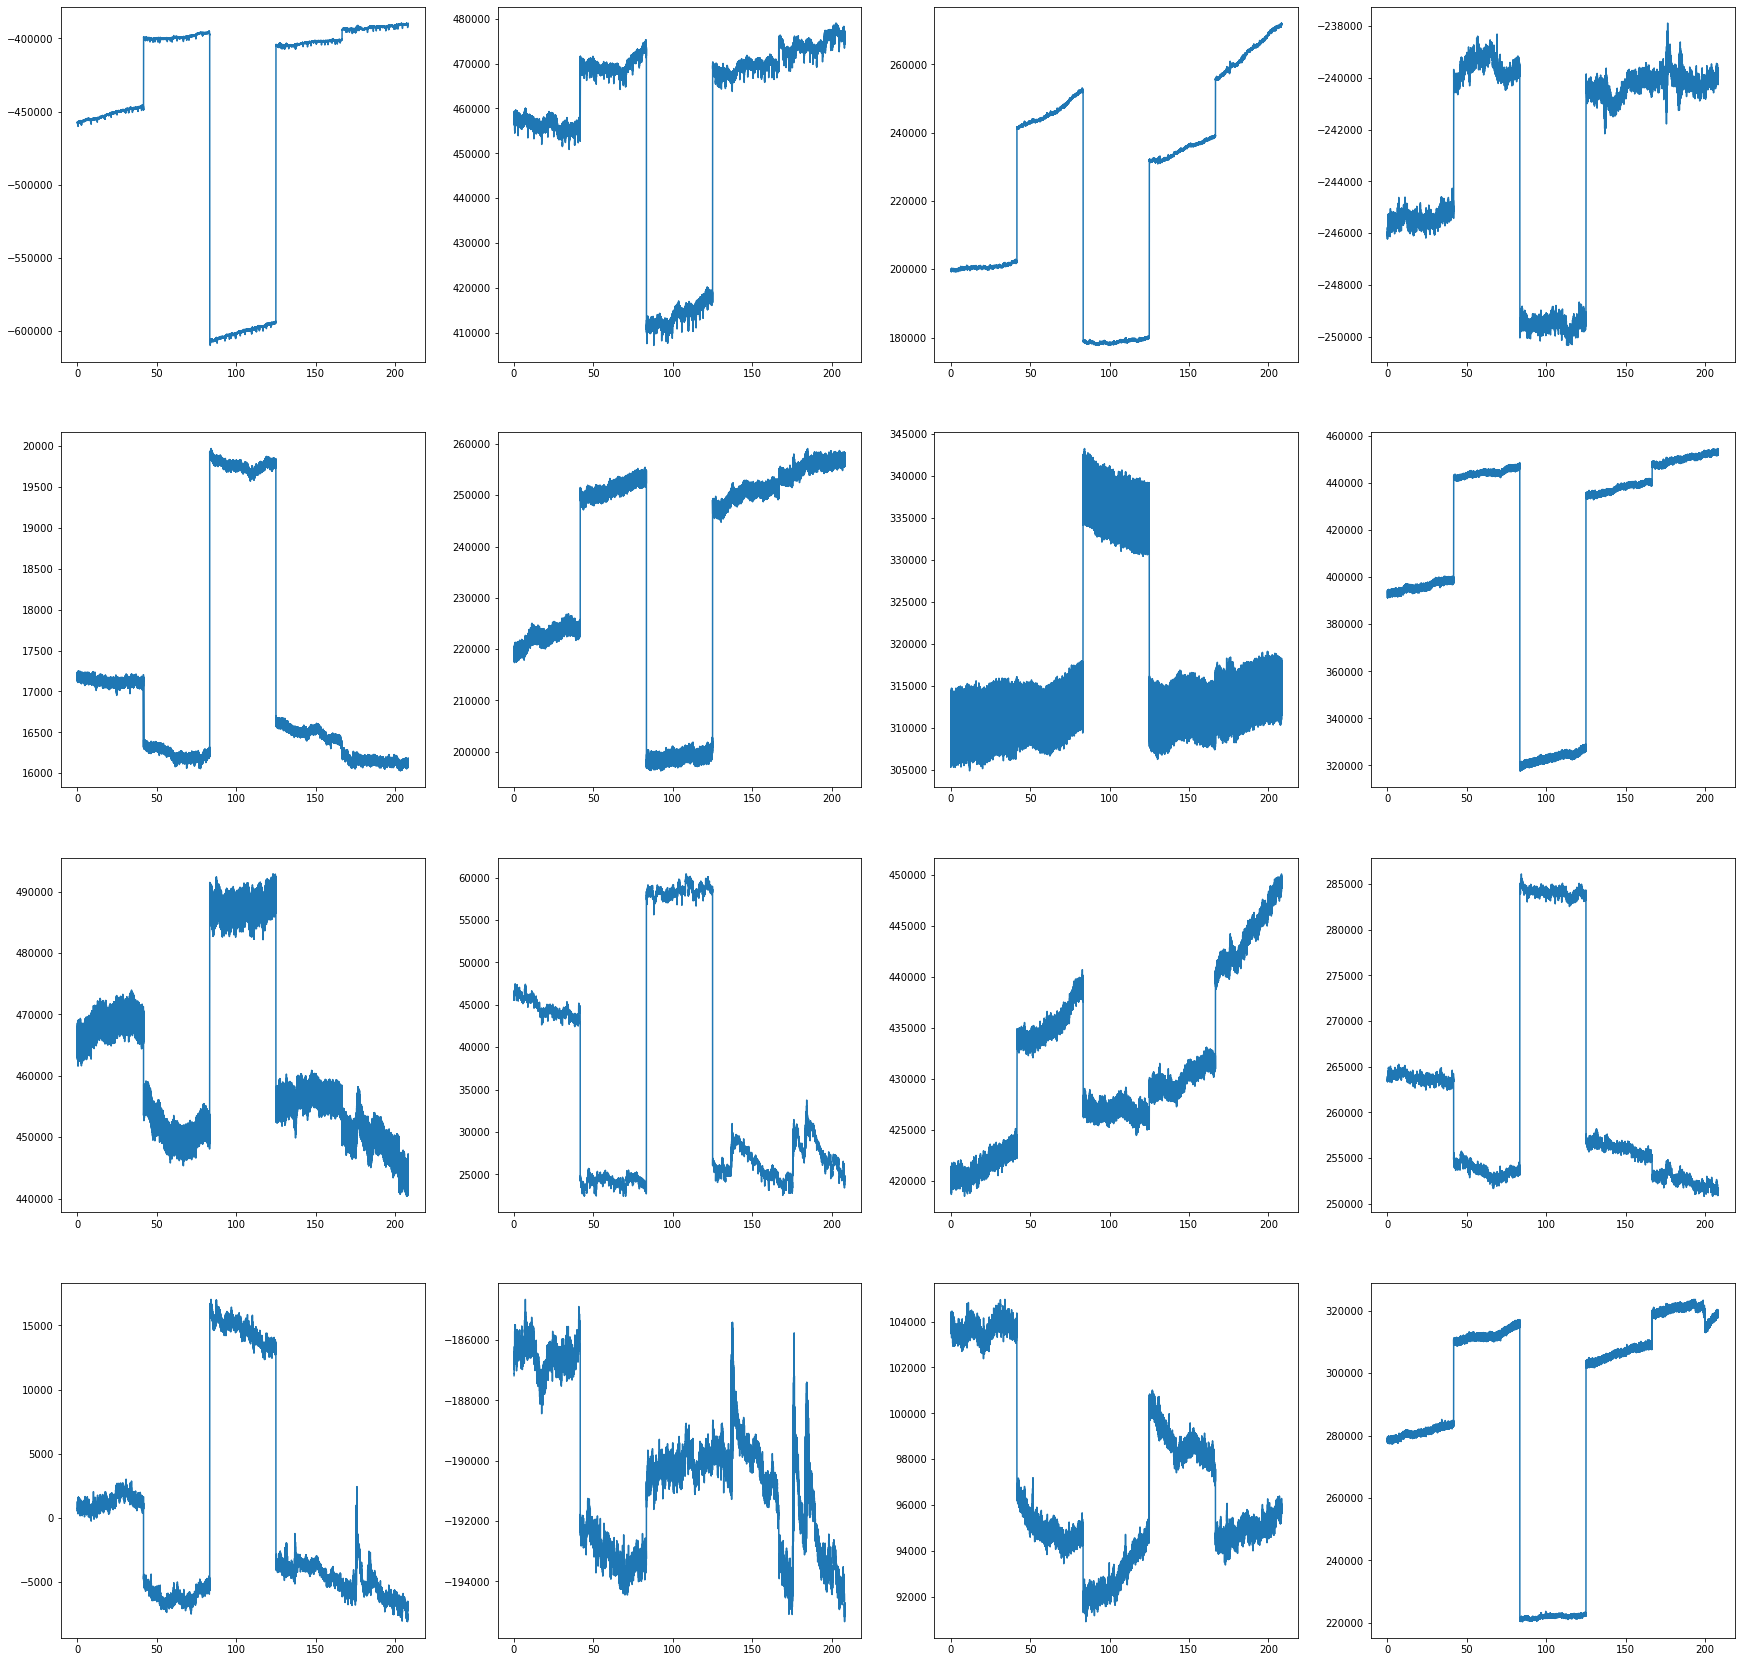

In [55]:
plt.figure(figsize=(30,30))
for i , col in enumerate(channels,1):
    plt.subplot(4,4,i)
    plt.plot(time, data[col])

In [56]:
# d = data.iloc[:,:-1]
# plt.plot(channels,d)

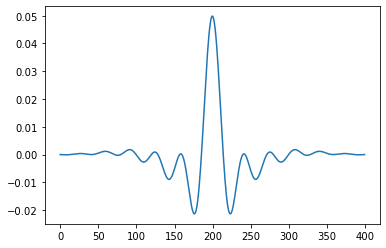

In [63]:
filter = signal.firwin(400, [0.01, 0.06], pass_zero=False)
plt.plot(filter)
plt.show()

In [61]:
data2 = signal.convolve(data, filter, mode='same')


ValueError: volume and kernel should have the same dimensionality